https://m.blog.naver.com/samsjang/221037822576

# load_data

In [1]:
import os
import struct
import numpy as np
import matplotlib.pyplot as plt

def load_mnist(path, kind='train'):
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels.idx1-ubyte'
                                % kind)
    images_path = os.path.join(path,
                               '%s-images.idx3-ubyte'
                               % kind)

    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II',
                                 lbpath.read(8))
        labels = np.fromfile(lbpath,
                             dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII",
                                               imgpath.read(16))
        images = np.fromfile(imgpath,
                             dtype=np.uint8).reshape(len(labels), 784)

    return images, labels

#### Loading the data

X_train, y_train = load_mnist('./data', kind='train')
X_test, y_test = load_mnist('./data', kind='t10k')

In [2]:
print('train_sample_number:\t:%d, column_number:%d' %(X_train.shape[0], X_train.shape[1]))
print('test_sample_number\t:%d, column_number:%d' %(X_test.shape[0], X_test.shape[1]))

train_sample_number:	:60000, column_number:784
test_sample_number	:10000, column_number:784


# preprocessing

In [3]:
X_train=X_train/255
X_test=X_test/255

In [4]:
def img(row, data):
    image = np.zeros((28,28))
    for i in range(0,28):
        for j in range(0,28):
            pix = 28*i+j
            image[i,j] = data[row, pix]
    plt.imshow(image, cmap = 'gray')
    plt.show()
    print(data[row,0])

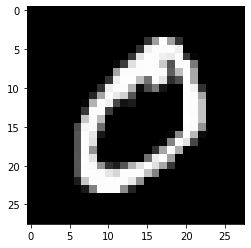

0.0


In [5]:
img(1, X_train)

# classifier

In [9]:
class MyClassifer(object):
    
    def __init__(self, C=0.1, alpha=.1, n_iter=50, shuffle=True):
        self.C=C#init_w+pridicted=c
        self.alpha=alpha
        self.n_iter=n_iter
        
        self.shuffle=shuffle
    
    def fit(self, X, y):
        data_n, data_f=np.shape(X)
        init_w=np.random.rand(data_f,1)
        w=init_w
        for num in range(0,9):
            for _ in range(0, self.n_iter):
                """
                if self.shuffle:
                    s_data,s_labels=self._shuffle(X,y)
                """
                for i in range(0, data_n):
                    true_class=self.find_labels(num, y[i])
                    pridicted_class=self.pridicted(X[i],w)
                    
                    delta_w=np.zeros(np.shape(X[i]))
                    delta_w=self.alpha*(true_class-pridicted_class)*X[i]
                    
        return delta_w+init_w
    
    def find_labels(self, num, y):
        return (y==num)*1
    
    def pridicted(self, X_p, w):
        return np.where(self.net_input(X_p,w) >= 0, 1, -1)
    
    def net_input(self, X_p,w):
        return np.dot(X_p, w)
    
    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = np.random.permutation(len(y))
        return X[r], y[r]
    
    def test(self, X, y, w):
        data_n, data_f=np.shape(X)
        
        for i in range(data_n):
            correct+=(y[i]==pridicted(X[i],w)*1)
            print(y[i])
            plt.imshow(X[i])
        return correct/data_n

In [10]:
mine=MyClassifer()

w = mine.fit(X_train, y_train)

In [11]:
mine.test(X_test, y_test, w)

UnboundLocalError: local variable 'correct' referenced before assignment